In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DATOS_LIMPIOS.csv')

In [3]:
print(df.head())

   Unnamed: 0  course_id  grade  online_progress  user_id  category  hours  \
0           0        224   0.00              0.0      138        27    0.0   
1           1        224   9.32              0.0      262        27    0.0   
2           2        224   9.66              0.0      265        27    0.0   
3           6        223   8.85              0.0      262        27    0.0   
4           7        223   9.43              0.0      265        27    0.0   

   mdl_user_id   planta_name                               1er acceso  \
0          183  ABP Arrasate          lunes, 4 de mayo de 2020, 17:04   
1          296  ABP Arrasate  viernes, 18 de diciembre de 2020, 14:44   
2          299  ABP Arrasate  viernes, 18 de diciembre de 2020, 16:18   
3          296  ABP Arrasate  viernes, 18 de diciembre de 2020, 14:44   
4          299  ABP Arrasate  viernes, 18 de diciembre de 2020, 16:18   

                             ultimo acceso  planta_id  language_es  
0       martes, 13 de j

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
print(df.shape)

(1159, 12)


In [6]:
df.isna().sum()

course_id          0
grade              0
online_progress    0
user_id            0
category           0
hours              0
mdl_user_id        0
planta_name        0
1er acceso         0
ultimo acceso      0
planta_id          0
language_es        0
dtype: int64

In [7]:
print(df.dtypes)

course_id            int64
grade              float64
online_progress    float64
user_id              int64
category             int64
hours              float64
mdl_user_id          int64
planta_name         object
1er acceso          object
ultimo acceso       object
planta_id            int64
language_es          int64
dtype: object


In [8]:
dfmodelo = df.iloc[:,[1,2,4,5,10,11]]

In [9]:
print(dfmodelo.head())

   grade  online_progress  category  hours  planta_id  language_es
0   0.00              0.0        27    0.0          2            1
1   9.32              0.0        27    0.0          2            1
2   9.66              0.0        27    0.0          2            1
3   8.85              0.0        27    0.0          2            1
4   9.43              0.0        27    0.0          2            1


In [10]:
dfmodelo.groupby(by=["hours"]).count()

,grade,online_progress,category,planta_id,language_es
hours,,,,,
0.000000,728,728,728,728,728
0.333333,17,17,17,17,17
0.666667,7,7,7,7,7
1.000000,89,89,89,89,89
2.000000,145,145,145,145,145
4.000000,84,84,84,84,84
6.000000,25,25,25,25,25
7.000000,1,1,1,1,1
8.000000,22,22,22,22,22


In [11]:
#ningun valor de horas igual a 0
filtro = dfmodelo['hours'] > 0
dfmodelo2 = dfmodelo[filtro]

In [12]:
print(dfmodelo2.head())

    grade  online_progress  category  hours  planta_id  language_es
8    0.00              0.0        27    2.0          2            1
9    0.00              0.0        27    2.0          2            1
10   0.00             10.0        27    2.0          2            0
11   8.08             20.0        27    2.0          1            1
12   6.22             30.0        27    2.0          1            1


In [13]:
# dfmodelo2['hours'].mean()

In [14]:
# promedio = 3.52

In [15]:
# print(dfmodelo2.shape)

In [16]:
# dfmodelo['hours'] = dfmodelo['hours'].replace(0.0, promedio)

In [17]:
print(dfmodelo.head())

   grade  online_progress  category  hours  planta_id  language_es
0   0.00              0.0        27    0.0          2            1
1   9.32              0.0        27    0.0          2            1
2   9.66              0.0        27    0.0          2            1
3   8.85              0.0        27    0.0          2            1
4   9.43              0.0        27    0.0          2            1


In [18]:
print(dfmodelo.shape)

(1159, 6)


In [19]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = dfmodelo2.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,grade,online_progress,0.576607,0.576607
6,online_progress,grade,0.576607,0.576607
4,grade,planta_id,-0.277272,0.277272
24,planta_id,grade,-0.277272,0.277272
25,planta_id,online_progress,-0.243877,0.243877
10,online_progress,planta_id,-0.243877,0.243877
26,planta_id,category,-0.243175,0.243175
16,category,planta_id,-0.243175,0.243175
8,online_progress,category,0.181419,0.181419
13,category,online_progress,0.181419,0.181419


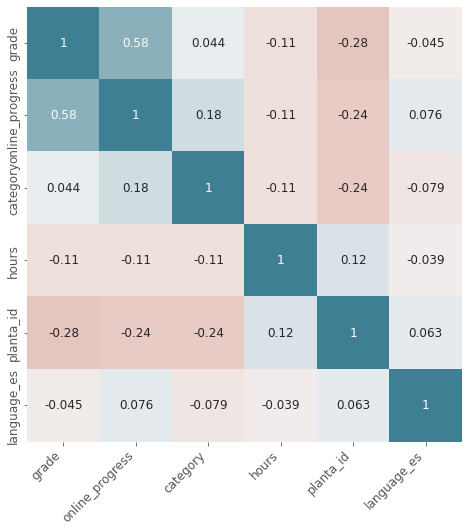

In [20]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

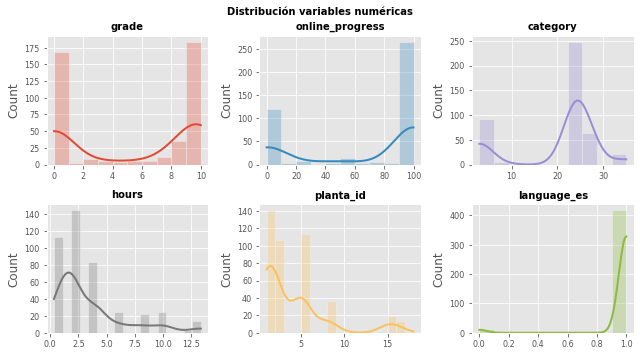

In [21]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = dfmodelo2.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = dfmodelo2,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [22]:
# División de los datos en train y test
# ==============================================================================
X = dfmodelo2[['online_progress', 'category', 'hours', 'planta_id', 'language_es']]
y = dfmodelo2['grade']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [23]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     43.87
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           8.14e-35
Time:                        15:24:20   Log-Likelihood:                -927.65
No. Observations:                 344   AIC:                             1867.
Df Residuals:                     338   BIC:                             1890.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.4011      1.334     

In [24]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna category del conjunto de train y test por su valor p
X_train = X_train.drop(columns = 'hours')
X_test  = X_test.drop(columns = 'hours')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     54.67
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           1.54e-35
Time:                        15:24:20   Log-Likelihood:                -928.06
No. Observations:                 344   AIC:                             1866.
Df Residuals:                     339   BIC:                             1885.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.1215      1.298     

In [25]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,2.569042,7.673999
online_progress,0.050848,0.068842
category,-0.090902,-0.006899
planta_id,-0.286990,-0.079470
language_es,-4.239032,0.367469


In [26]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

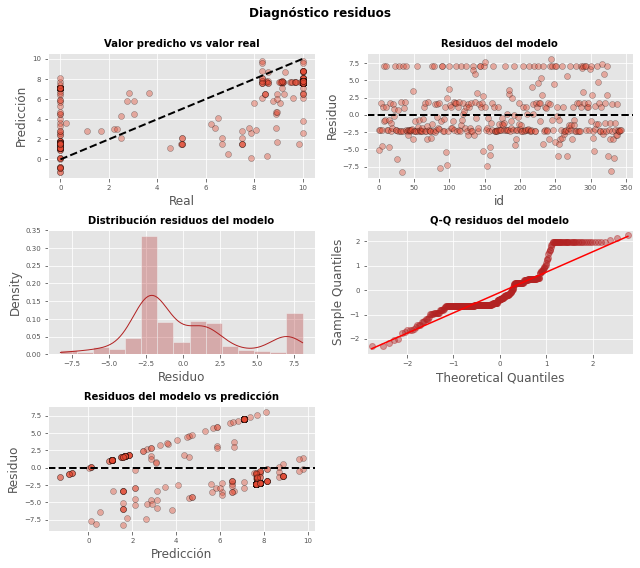

In [27]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [28]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.8851665258407593, pvalue=2.2251970570514625e-15)

In [29]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 25.80841542963001, p-value = 2.4875613253388376e-06


In [30]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
754,7.813373,0.271314,7.279702,8.347045,0.674561,14.952186
1030,1.573197,0.474167,0.640517,2.505877,-5.606478,8.752873
811,7.813373,0.271314,7.279702,8.347045,0.674561,14.952186
1133,1.682185,0.454795,0.787610,2.576761,-5.492640,8.857010


In [31]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 3.957302331005243


grade = 5.1215 + (0.0598 * online_progress) - (0.0489 * category) - (0.1832 * planta_id) - (1.9358 * languague_es)